# Central Limit Theorem example

Here, we try adding uniform distributions a few times and we quickly end up with a Gaussian.


In [2]:
from typing import Optional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

The idea is simple: generate random values between $-1$ and $1$ and make a histogram of them. The histogram will look like a box.

The Central Limit Theorem tells us that the mean of $N$ variables with variance $\sigma^2$ is a Gaussian with variance $\sigma^2/N$ in the limit that $N \rightarrow \infty$.

Notice that the variance of this uniform distribution is not 1: calculate it, and you will see that its variance is 1/3 (so $\sqrt{\text{var}}=\sqrt{3}/3\approxeq 0.57$). We will see that below.


In [3]:
# this generates random uniform samples
def random_samples(n_samples: int) -> np.ndarray:
    return (2*np.random.rand(n_samples) - 1)

Let's make a function to generate samples.

In [4]:
n_samples = 10000
x = random_samples(n_samples)

x has now arbitrary numbers between $-1$ and $1$:

In [5]:
pd.DataFrame(dict(x=x))

,x
0,0.235730
1,-0.587471
2,0.325833
3,0.786101
4,0.480421
...,...
9995,-0.995029
9996,-0.299443
9997,-0.464221
9998,0.751605


Let's check its mean and variance:

In [6]:
pd.DataFrame(dict(x=x)).describe()

,x
count,10000.000000
mean,0.013094
std,0.582749
min,-0.999871
25%,-0.496063
50%,0.025202
75%,0.523966
max,0.999870


We can make a histogram of it to try to double check:

[Text(0, 0.5, 'Fraction of occurrences / bin size'), Text(0.5, 0, 'x')]

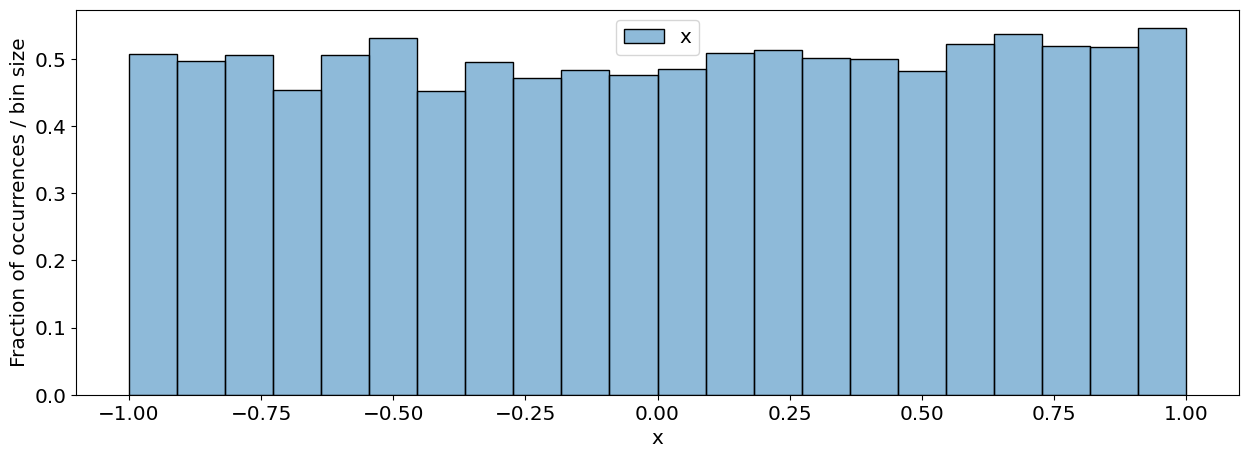

In [7]:
sns.histplot(pd.DataFrame(dict(x=x)), stat="density")
plt.gca().set(ylabel="Fraction of occurrences / bin size", xlabel="x")

It looks like the probability of getting a specific x value is indeed the same for all x in the range [-1, 1].

Let's get values of x independently and sum them $N$ times:

In [8]:
def get_many_x(N: int) -> pd.DataFrame:
    return pd.DataFrame({f"x{k}": random_samples(n_samples) for k in range(N)})

In [9]:
N = 10
data = get_many_x(N=10)

In [10]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.557678,-0.973417,0.722963,-0.011507,-0.297092,-0.096422,0.649971,-0.822024,-0.953068,-0.465009
1,0.077690,-0.597280,0.659335,0.433345,0.407872,0.026935,0.760887,0.375025,0.436400,0.940421
2,0.389252,0.312857,0.744985,-0.547178,0.918958,0.842294,-0.839457,-0.885617,-0.660291,0.799358
3,0.002392,-0.452201,0.626875,0.467181,-0.242254,0.342050,-0.804150,-0.757346,0.534880,-0.822235
4,0.013865,0.772512,-0.336169,-0.955743,-0.352194,0.788721,0.636567,0.583178,0.733763,-0.785763
...,...,...,...,...,...,...,...,...,...,...
9995,0.696557,0.653128,-0.452445,-0.474580,0.143816,-0.049960,-0.768933,-0.174698,-0.104592,0.463803
9996,-0.897026,-0.488836,-0.014449,-0.757131,0.316350,0.042017,-0.403770,0.548561,0.591823,-0.550146
9997,0.834296,-0.850360,0.727586,-0.098943,-0.560702,0.054720,0.673407,-0.041506,0.252130,-0.175144
9998,-0.715145,-0.483422,0.874546,0.463453,-0.359133,-0.131677,0.906279,0.422127,-0.231510,-0.981712


Each x column has independent values of a uniform distribution. We can double check that:

[Text(0, 0.5, 'Fraction of occurrences / bin size'), Text(0.5, 0, 'x')]

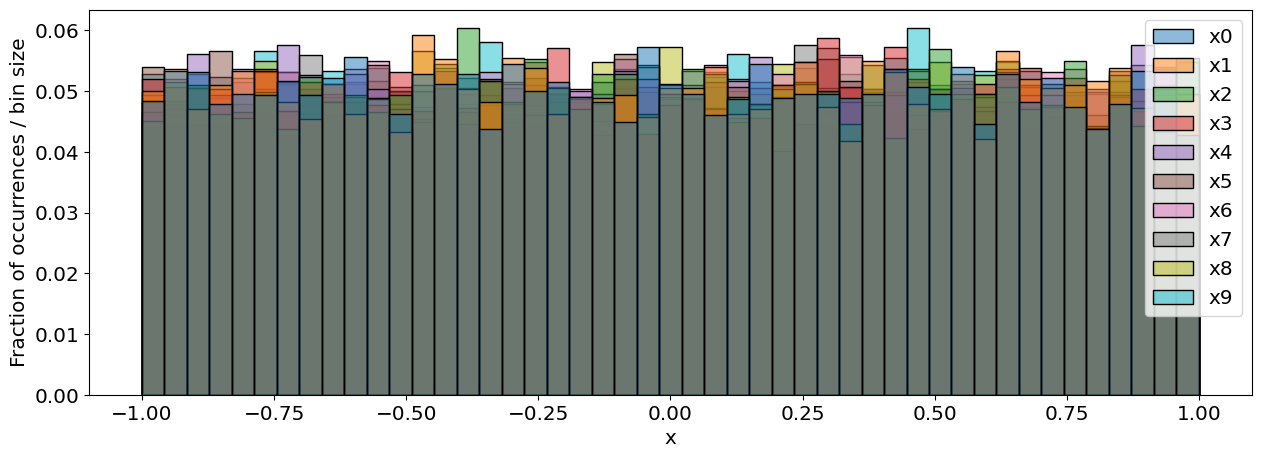

In [11]:
sns.histplot(data.loc[:, [f"x{k}" for k in range(N)]], stat="density")
plt.gca().set(ylabel="Fraction of occurrences / bin size", xlabel="x")

They all look mostly flat. Now let's create a new variable, called "mean_x_0_{k}", which will be the mean of the x variables from 0 until the k-th element:

In [12]:
for k in range(N):
    data[f"mean_x_0_{k}"] = sum(data.loc[:, f"x{i}"] for i in range(k+1))/float(k+1)

Let's histogram these sums:

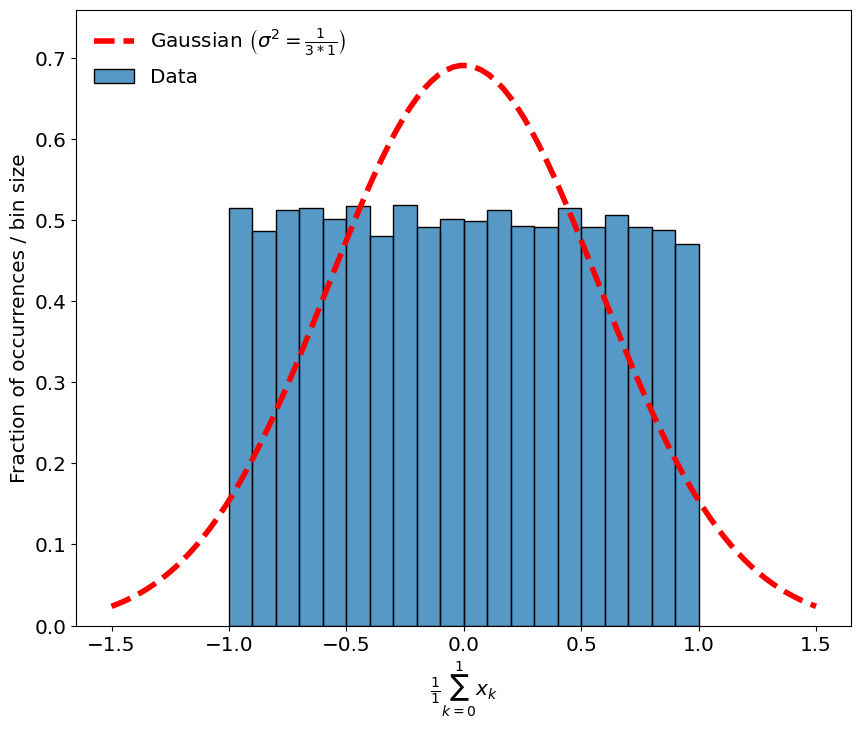

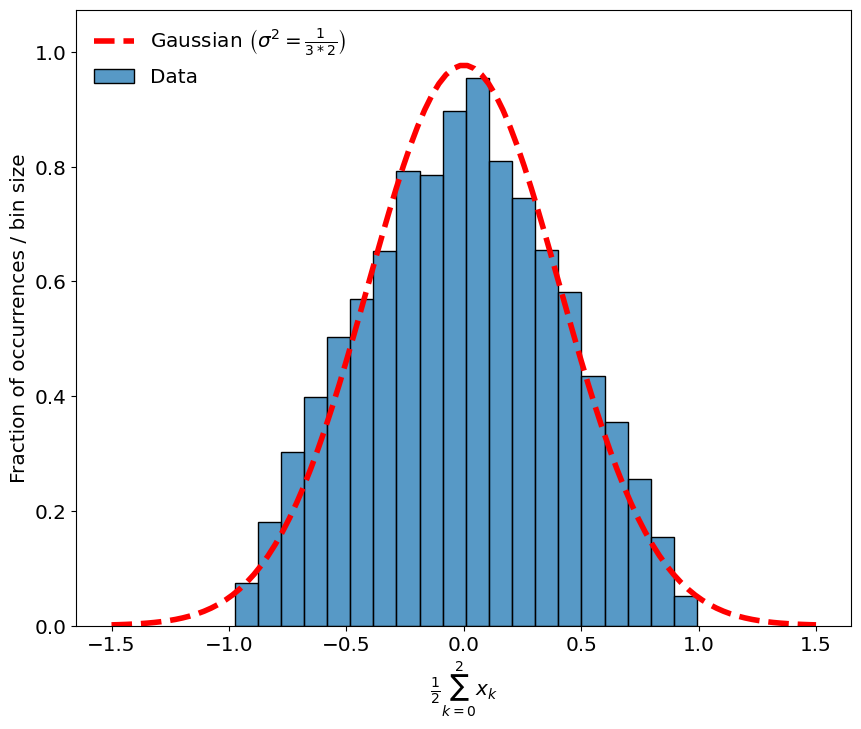

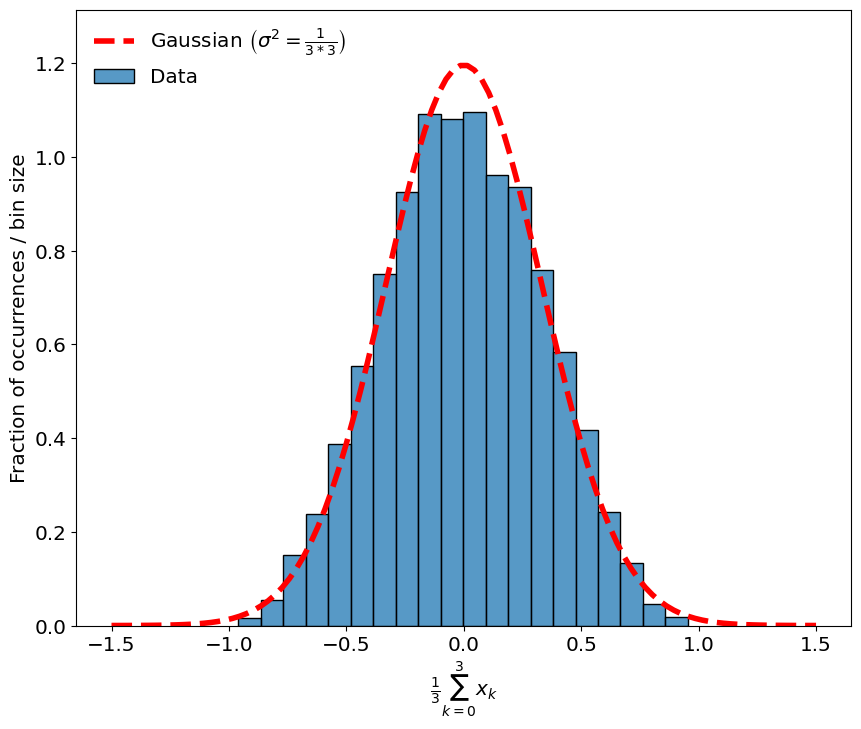

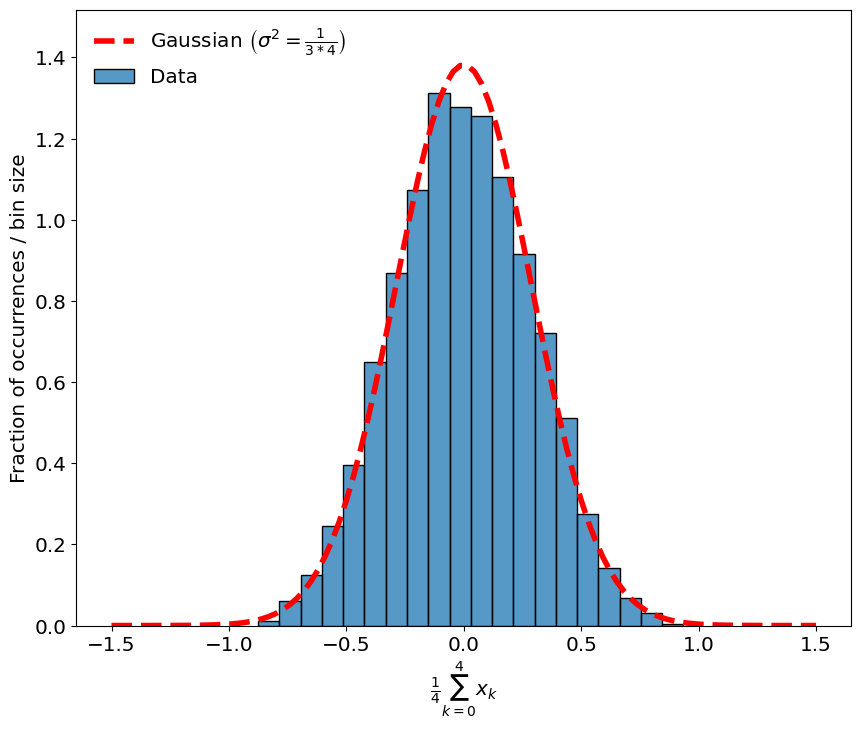

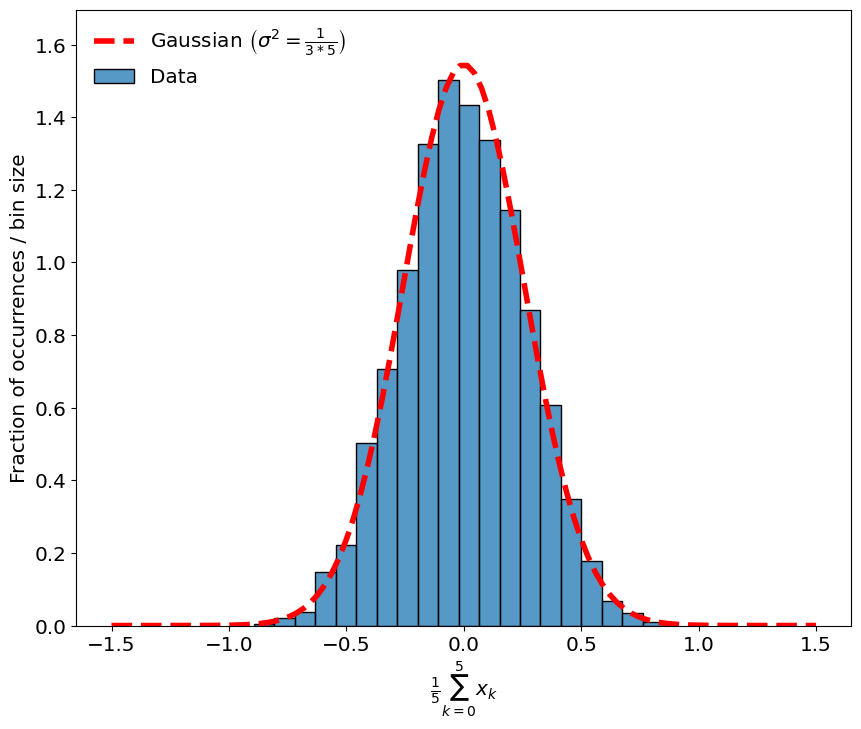

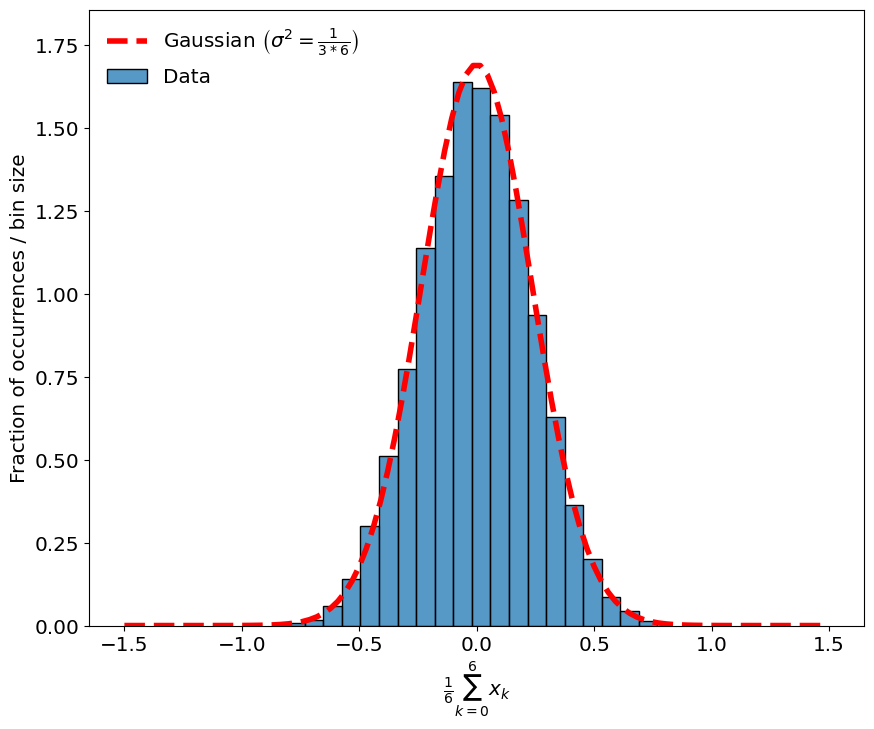

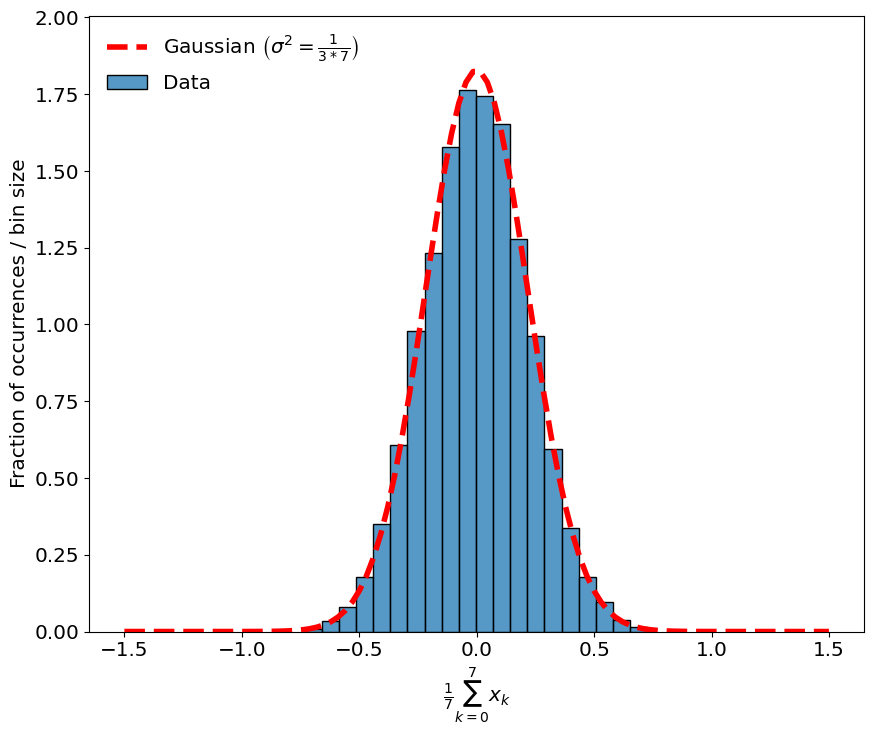

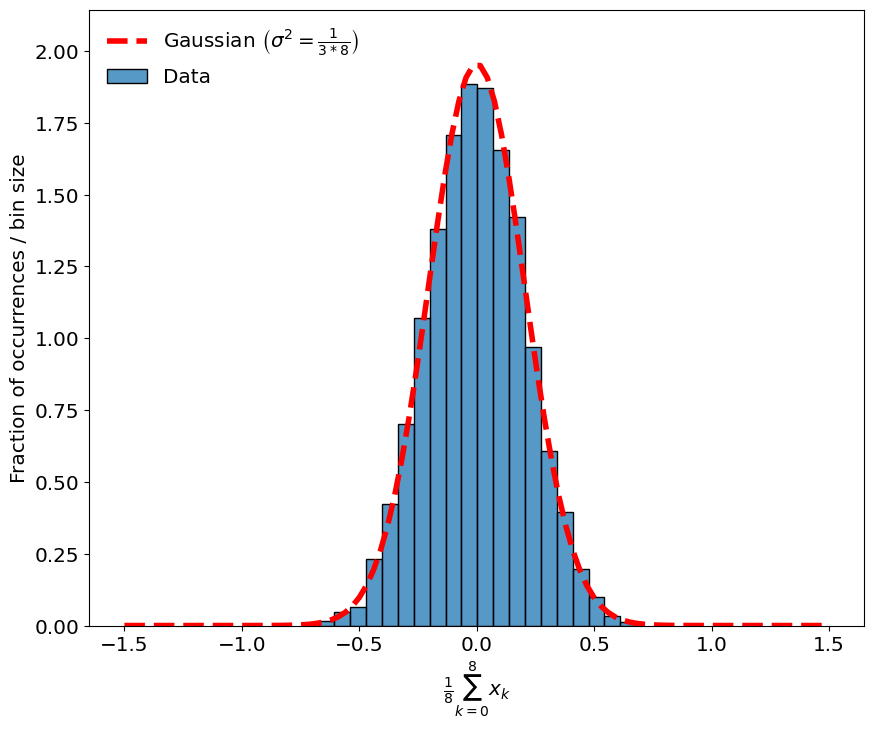

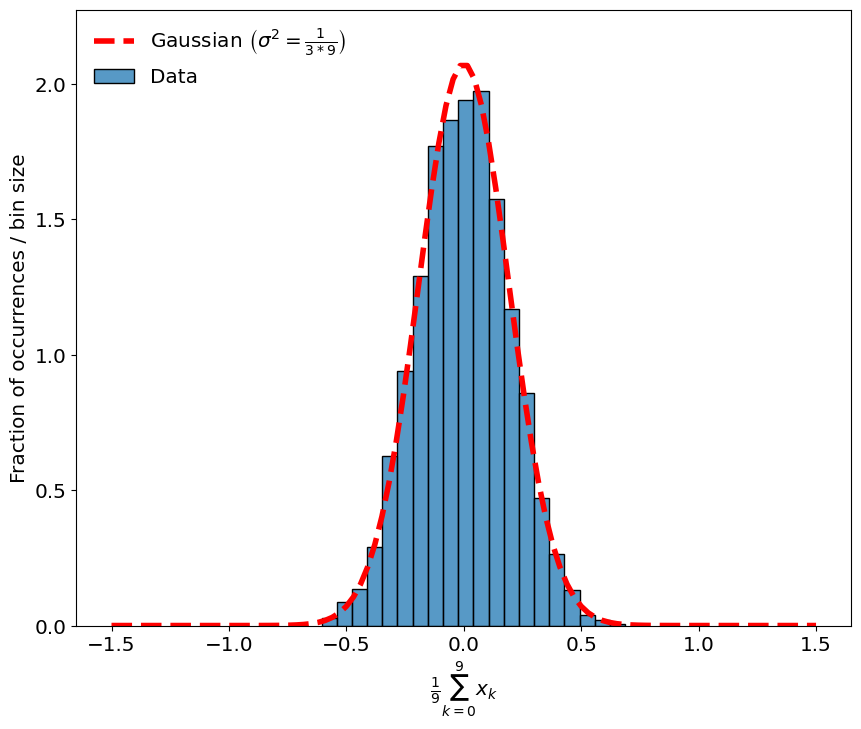

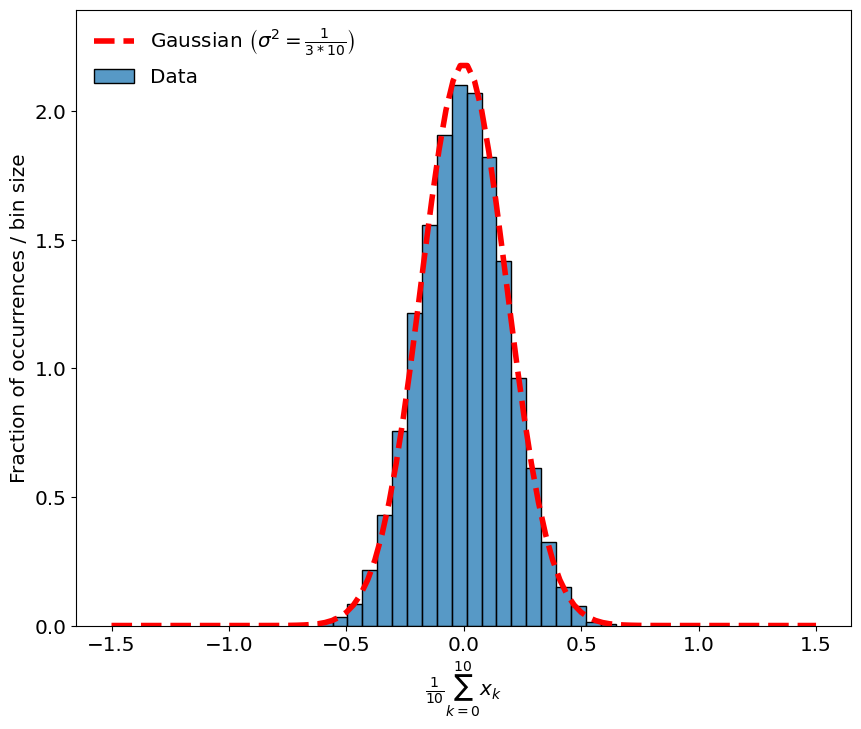

In [13]:
original_variance = 1/3
for k in range(N):
    nbins = 20
    fig = plt.figure(figsize=(10, 8))
    sns.histplot(data=data, x=f"mean_x_0_{k}", bins=nbins, stat="density", label="Data")
    xg = np.linspace(-1.5, 1.5, 100)
    yg = 1/np.sqrt(2*np.pi*original_variance/(k+1))*np.exp(-xg**2/2/(original_variance/(k+1)))
    plt.plot(xg, yg, label=r"Gaussian $\left(\sigma^2 = \frac{1}{3 * "+f"{k+1}"+r"}\right)$", ls="--", color="r", lw=4)
    plt.gca().set(xlabel=r"$\frac{1}{"+f"{k+1}"+r"}\sum_{k=0}^{"+f"{k+1}"+r"} x_{k}$", ylabel="Fraction of occurrences / bin size", ylim=(0, np.amax(yg)*1.1))
    plt.legend(frameon=False, loc="upper left")
    plt.savefig(f"clt_{k}.png")
    plt.show()

In [15]:
# mean for 1000 variables:
mean_many = sum(random_samples(n_samples) for k in range(1000))/1000

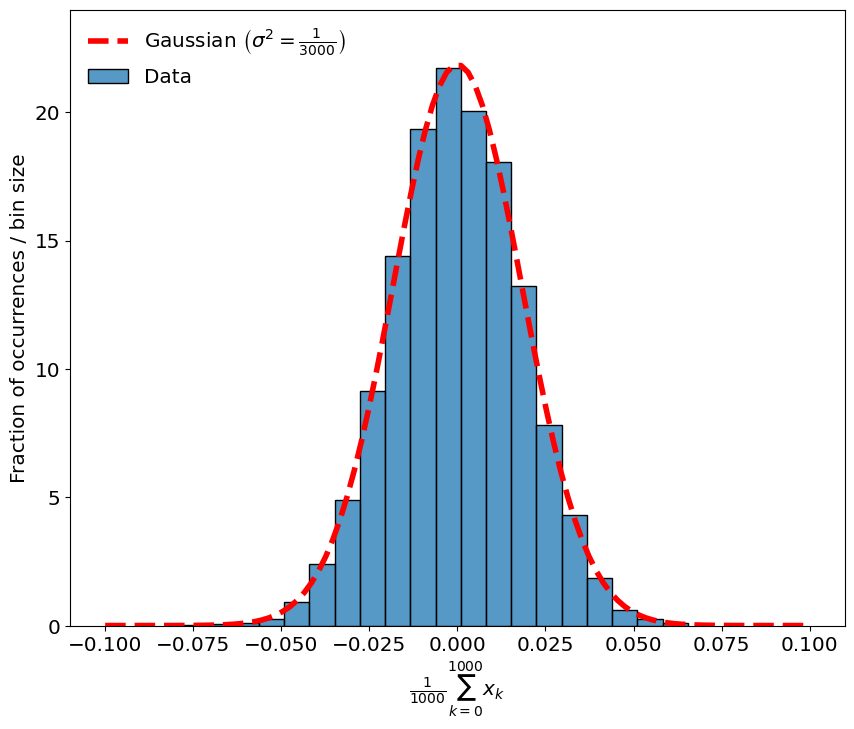

In [17]:
nbins = 20
fig = plt.figure(figsize=(10, 8))
sns.histplot(data=mean_many, bins=nbins, stat="density", label="Data")
xg = np.linspace(-0.1, 0.1, 100)
yg = 1/np.sqrt(2*np.pi/3/1000)*np.exp(-xg**2/2/(1/3/1000))
plt.plot(xg, yg, label=r"Gaussian $\left(\sigma^2 = \frac{1}{3000}\right)$", ls="--", color="r", lw=4)
plt.gca().set(xlabel=r"$\frac{1}{1000}\sum_{k=0}^{1000} x_{k}$", ylabel="Fraction of occurrences / bin size", ylim=(0, np.amax(yg)*1.1))
plt.legend(frameon=False, loc="upper left")
plt.savefig(f"clt_many.png")
plt.show()